In [1]:
import cv2
import cv2.aruco as aruco
from glob import glob
import pandas as pd
from os.path import basename, isfile
from scipy import stats
import numpy as np

In [2]:
# Define the parameters for the Charuco board
num_squares_x = 5
num_squares_y = 7
square_length = 100
marker_length = 80

# Create the Charuco board
board = aruco.CharucoBoard(
    size=(num_squares_x, num_squares_y),
    squareLength=square_length,
    markerLength=marker_length,
    dictionary=aruco.getPredefinedDictionary(aruco.DICT_4X4_50)
)

In [3]:
images = pd.DataFrame(glob(
    '../../../bilderserien/Focustest/fokus_serie/*.jpg'), columns=['path'])
images.reset_index(inplace=True)
images.rename(inplace=True, columns={"index": "img_id"})
images.set_index("img_id", inplace=True)
images["focus"] = [float(basename(i)[1:4]) for i in images["path"]]
images

,path,focus
img_id,,
0,../../../bilderserien/Focustest/fokus_serie/f1...,10.0
1,../../../bilderserien/Focustest/fokus_serie/f4...,4.0
2,../../../bilderserien/Focustest/fokus_serie/f0...,0.5
3,../../../bilderserien/Focustest/fokus_serie/f0...,0.5
4,../../../bilderserien/Focustest/fokus_serie/f0...,0.5
5,../../../bilderserien/Focustest/fokus_serie/f0...,0.5
6,../../../bilderserien/Focustest/fokus_serie/f1...,1.0
7,../../../bilderserien/Focustest/fokus_serie/f1...,1.0
8,../../../bilderserien/Focustest/fokus_serie/f1...,1.0


In [4]:
marker_tmp = []
for img_id, img in images.iterrows():
    # Load the image
    image = cv2.imread(img["path"])

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect Charuco markers
    corners, ids, rejected = aruco.detectMarkers(
        gray, aruco.getPredefinedDictionary(aruco.DICT_4X4_50))

    # If markers are found, detect Charuco board
    if len(corners) > 0:
        retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(
            corners, ids, gray, board)
        for i in range(len(charuco_corners)):
            marker_tmp.append([img_id, charuco_corners[i][0][0],
                               charuco_corners[i][0][1], charuco_ids[i][0]])
marker = pd.DataFrame(
    marker_tmp, columns=["img_id", "corner_x", "corner_y", "marker_id"])

In [5]:
j = marker.join(images, on="img_id")
j

,img_id,corner_x,corner_y,marker_id,path,focus
0,0,2864.618652,698.187256,4,../../../bilderserien/Focustest/fokus_serie/f1...,10.0
1,0,2885.506592,1099.134888,5,../../../bilderserien/Focustest/fokus_serie/f1...,10.0
2,0,2907.337891,1520.114990,6,../../../bilderserien/Focustest/fokus_serie/f1...,10.0
3,0,2938.622070,1972.581543,7,../../../bilderserien/Focustest/fokus_serie/f1...,10.0
4,0,2454.016602,1105.706299,9,../../../bilderserien/Focustest/fokus_serie/f1...,10.0
...,...,...,...,...,...,...
819,43,2946.255615,1954.344971,7,../../../bilderserien/Focustest/fokus_serie/f9...,9.0
820,43,2453.722656,1104.857178,9,../../../bilderserien/Focustest/fokus_serie/f9...,9.0
821,43,2475.479004,1516.440918,10,../../../bilderserien/Focustest/fokus_serie/f9...,9.0
822,43,2036.646973,1102.862183,13,../../../bilderserien/Focustest/fokus_serie/f9...,9.0


In [6]:
k = j.groupby(["marker_id", "focus",]).agg(
    {"corner_x": "mean", "corner_y": "mean"})
# .pivot_table(index="focus", columns="marker_id", values=["corner_x", "corner_y"])

In [7]:
c = ((0.0047)/0.0000014)
k["corner_x_norm"] = (k["corner_x"]-2304)/c
k["corner_y_norm"] = (k["corner_y"]-(2592/2))/c

In [8]:
tmp = k.reset_index()
print(tmp.groupby("focus").count())
m = tmp[tmp["focus"] == 5.0]["marker_id"].unique()
m

       marker_id  corner_x  corner_y  corner_x_norm  corner_y_norm
focus                                                             
0.5           15        15        15             15             15
1.0           16        16        16             16             16
2.0           24        24        24             24             24
3.0           24        24        24             24             24
4.0           24        24        24             24             24
5.0           24        24        24             24             24
6.0           24        24        24             24             24
7.0           24        24        24             24             24
8.0           19        19        19             19             19
9.0           16        16        16             16             16
10.0           8         8         8              8              8


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [9]:
k["corner_x_faktor"] = 0
k["corner_y_faktor"] = 0
k

corner_x     corner_y  corner_x_norm  corner_y_norm  \
marker_id focus                                                           
0         0.5    3209.078125   739.322021       0.269598      -0.165819   
          1.0    3213.105469   736.578552       0.270797      -0.166636   
          2.0    3214.094238   738.938049       0.271092      -0.165933   
          3.0    3226.717285   730.385498       0.274852      -0.168481   
          4.0    3234.410156   725.463318       0.277143      -0.169947   
...                      ...          ...            ...            ...   
23        3.0    1179.175171  1955.536011      -0.335054       0.196458   
          4.0    1166.962402  1962.809204      -0.338692       0.198624   
          5.0    1157.728760  1968.255371      -0.341442       0.200246   
          6.0    1150.679688  1972.166626      -0.343542       0.201411   
          7.0    1144.648071  1975.269531      -0.345339       0.202336   

                 corner_x_faktor  corner_y_faktor  
marker_id focus                                    
0         0.5                  0                0  
          1.0                  0                0  
          2.0                  0                0  
          3.0                  0                0  
          4.0                  0                0  
...                          ...              ...  
23        3.0                  0                0  
          4.0                  0                0  
          5.0                  0                0  
          6.0                  0                0  
          7.0                  0                0  

[218 rows x 6 columns]

In [10]:
for i in m:
    ref = k.loc[i, 5.0]
    for s in k.loc[i].index:
        k.at[(i, s), "corner_x_faktor"] = k.loc[i,
                                                s]["corner_x_norm"] / ref["corner_x_norm"]
        k.at[(i, s), "corner_y_faktor"] = k.loc[i,
                                                s]["corner_y_norm"] / ref["corner_y_norm"]

/tmp/ipykernel_24964/3448089226.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.9650585236550953' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  k.at[(i, s), "corner_x_faktor"] = k.loc[i,
/tmp/ipykernel_24964/3448089226.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.967966674854891' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  k.at[(i, s), "corner_y_faktor"] = k.loc[i,


In [59]:
faktor = k.groupby("focus").agg(
    {"corner_x_faktor": "mean", "corner_y_faktor": "mean"})
faktor

,corner_x_faktor,corner_y_faktor
focus,,
0.5,0.967116,0.964827
1.0,0.970362,0.970429
2.0,0.975161,0.972732
3.0,0.979596,0.981183
4.0,0.991064,0.990639
5.0,1.000000,1.000000
6.0,1.005992,1.006328
7.0,1.009976,1.012079
8.0,1.013691,1.017066


In [62]:
f = 0.00474
faktor["faktor_soll"] = ((1./f)-5.) / ((1./f)-faktor.reset_index()["focus"])
faktor

,corner_x_faktor,corner_y_faktor,faktor_soll
focus,,,
0.5,0.967116,0.964827,NaN
1.0,0.970362,0.970429,0.980950
2.0,0.975161,0.972732,0.985644
3.0,0.979596,0.981183,0.990383
4.0,0.991064,0.990639,0.995168
5.0,1.000000,1.000000,1.000000
6.0,1.005992,1.006328,1.004879
7.0,1.009976,1.012079,1.009805
8.0,1.013691,1.017066,1.014780


<AxesSubplot: xlabel='focus'>

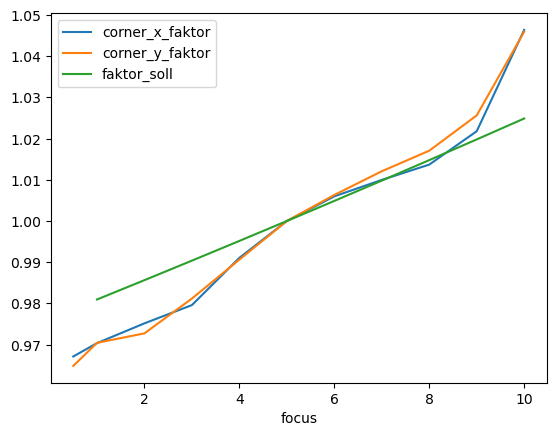

In [64]:
faktor.plot()

In [65]:
sift = cv2.SIFT_create()  # type: ignore

for img_id, img in images.iterrows():
    if isfile(img["path"] + '.npz'):
        continue
    # Load the image
    image = cv2.imread(img["path"])

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect SURF keypoints and compute descriptors
    kp, des = sift.detectAndCompute(gray, None)
    pt = np.array([n.pt for n in kp])
    np.savez_compressed(img["path"] + '.npz', des=des, pt=pt)

In [66]:
# Load the image
image1: str = list(images[images["focus"] == 5.]["path"])[0]
image2: str = list(images[images["focus"] == 2.]["path"])[0]

In [129]:
def match(image1: str, image2: str):
    data1 = np.load(image1 + '.npz')
    data2 = np.load(image2 + '.npz')
    k1, d1 = data1["pt"], data1["des"]
    k2, d2 = data2["pt"], data2["des"]

    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(d1, d2, k=2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m, n in matches:
        if m.distance < 0.7*n.distance and np.linalg.norm(k1[m.queryIdx]-k2[m.trainIdx], ord=1) < 200:
            good.append(m)

    matches = pd.DataFrame(np.array([[k1[m.queryIdx], k2[m.trainIdx]]
                                     for m in good]).reshape(-1, 4), columns=["x1", "y1", "x2", "y2"])
    return matches

In [80]:
matches = match(image1, image2)

In [81]:
matches

,x1,y1,x2,y2
0,733.791565,1085.418213,817.647034,1092.593506
1,733.791565,1085.418213,817.647034,1092.593506
2,773.607117,938.731079,841.667297,965.561401
3,803.103088,1660.764160,880.898804,1640.764282
4,825.969482,1740.596069,897.387878,1717.458740
...,...,...,...,...
212,3697.980225,1141.704590,3631.722900,1136.231934
213,3706.716797,1632.236450,3628.685303,1616.462524
214,3729.638672,907.075989,3663.150635,936.491272
215,3835.378174,1564.113281,3749.562012,1550.542847


<AxesSubplot: xlabel='x1', ylabel='diff_x'>

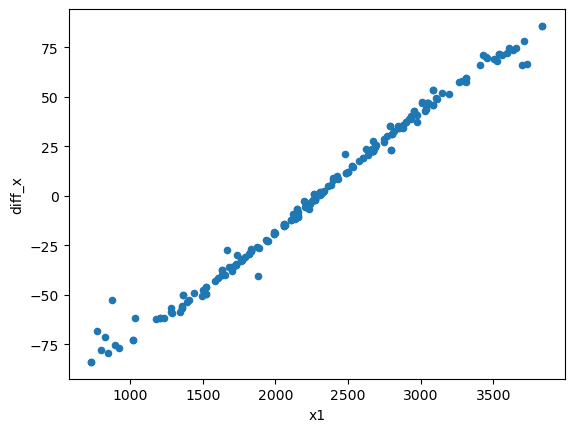

In [90]:
matches["diff_x"] = matches["x1"]-matches["x2"]
matches["diff_y"] = matches["y1"]-matches["y2"]
matches["distance"] = np.sqrt(matches["diff_x"]**2+matches["diff_y"]**2)
# matches = matches[matches["distance"] < 250]
matches.plot.scatter(x="x1", y="diff_x")

In [91]:
from sklearn.linear_model import LinearRegression
x = matches[['x1']]
y = matches[['diff_x']]
model = LinearRegression()
model.fit(x, y)
ax = model.coef_[0][0]
mx = model.intercept_[0]
dx = mx/ax
ax, dx

(0.05696512581052048, -2284.4417727763384)

In [92]:
from sklearn.linear_model import LinearRegression
x = matches[['y1']]
y = matches[['diff_y']]
model = LinearRegression()
model.fit(x, y)
ay = model.coef_[0][0]
my = model.intercept_[0]
dy = my/ay
ay, dy

(0.05866476689770196, -1291.336115075764)

In [93]:
matches["x1n"] = matches["x1"]+dx
matches["y1n"] = matches["y1"]+dy

<AxesSubplot: xlabel='dn', ylabel='distance_'>

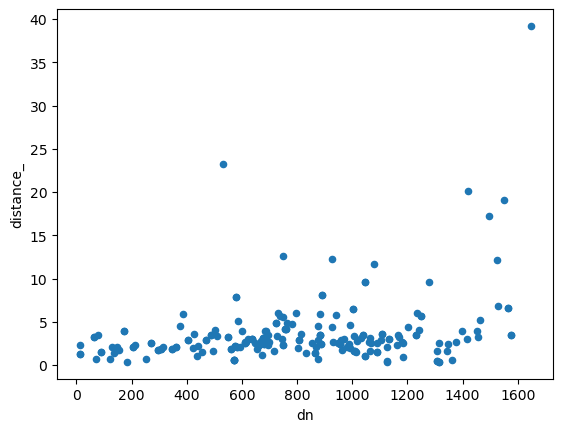

In [94]:
matches["diff_x_"] = matches["diff_x"]-matches["x1n"]*ax
matches["diff_y_"] = matches["diff_y"]-matches["y1n"]*ay
matches["distance_"] = np.sqrt(matches["diff_x_"]**2+matches["diff_y_"]**2)
matches["dn"] = np.sqrt(matches["x1n"]**2+matches["y1n"]**2)
matches.plot.scatter(x="dn", y="distance_")

<AxesSubplot: xlabel='x1n', ylabel='diff_faktor'>

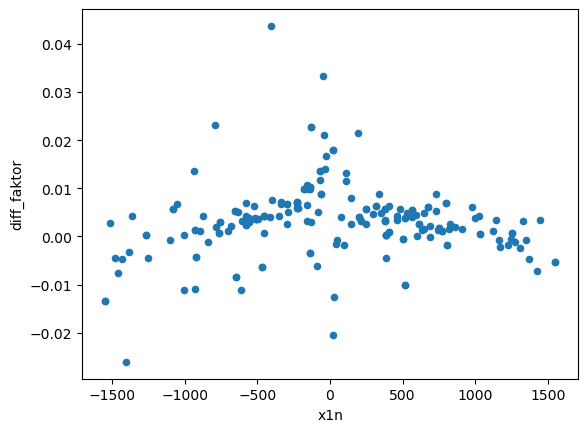

In [95]:
matches["diff_faktor"] = (
    matches["diff_x_"]/matches["x1n"] + matches["diff_y_"]/matches["y1n"])/2

matches[abs(matches["diff_faktor"]) < 0.05].plot.scatter(
    x="x1n", y="diff_faktor")

0.0031581105921480333 1.142542587373864


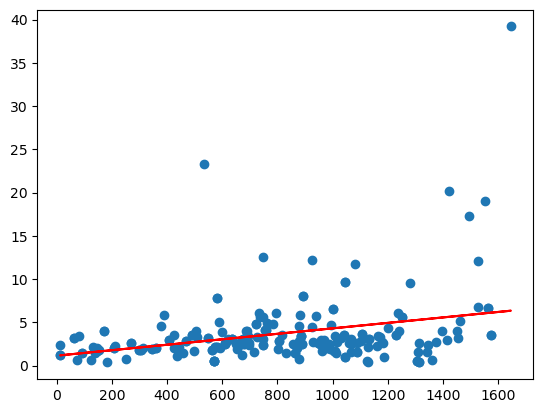

In [96]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x = matches[['dn']]
y = matches[['distance_']]
model = LinearRegression()
model.fit(x, y)
print(model.coef_[0][0], model.intercept_[0])

y_pred = model.predict(x)  # make predictions
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [169]:
ko, do = None, None

image1 = list(images[images["focus"] == 5.]["path"])[0]
joined = None
for fokus in [0.5, 1, 2, 3, 4, 6, 7, 8, 9, 10]:
    matches = match(image1, list(images[images["focus"] == fokus]["path"])[0])
    matches.rename(inplace=True, columns={
                   "x1": "x_5", "y1": "y_5", "x2": f"x_{fokus}", "y2": f"y_{fokus}"})

    matches.set_index(["x_5", "y_5"], inplace=True)
    if joined is None:
        joined = matches
    else:
        joined = joined.join(matches, rsuffix=fokus)
    joined.dropna(inplace=True)
joined.reset_index(inplace=True)
joined.sort_values(by="x_5", inplace=True)
joined.drop_duplicates(inplace=True)
joined

,x_5,y_5,x_0.5,y_0.5,x_1,y_1,x_2,y_2,x_3,y_3,...,x_6,y_6,x_7,y_7,x_8,y_8,x_9,y_9,x_10,y_10
0,707.089966,2405.148193,781.992432,2348.021729,773.226746,2353.816650,755.209839,2367.543701,739.879272,2379.799316,...,699.953735,2409.564453,693.564758,2413.587158,693.104797,2411.922363,693.021423,2410.312744,691.413574,2410.583740
16,800.475952,1893.690186,848.677368,1874.554199,843.597900,1876.454346,832.506409,1880.296875,821.933533,1885.103516,...,790.284973,1898.174194,780.157532,1902.470215,770.534607,1906.852295,761.433167,1910.756104,753.280457,1914.445801
17,897.919617,1040.989868,945.280029,1051.243530,939.581299,1050.234497,929.904602,1048.018311,918.486084,1045.994995,...,887.765991,1038.781372,878.046204,1038.700195,868.637268,1037.076782,858.680237,1036.317627,850.736633,1034.948242
18,967.420837,1335.560425,1015.484924,1334.574707,1010.545227,1334.408569,1000.108459,1334.030151,988.980652,1334.783813,...,958.394409,1335.781128,949.807495,1336.206909,940.896851,1336.445435,931.921143,1336.592651,923.039795,1337.111572
19,1044.332397,1723.283447,1080.708374,1709.296387,1077.775269,1710.316650,1070.524292,1713.383423,1062.376221,1716.435791,...,1034.461548,1726.427368,1024.760742,1729.366089,1014.604919,1732.073242,1004.781128,1734.898682,990.109253,1737.978149
20,1062.927246,954.554626,1103.846436,966.641357,1099.777466,965.078979,1089.589600,962.009888,1080.122437,959.746582,...,1051.459351,952.937439,1042.641968,950.147583,1034.889282,947.033997,1025.805786,944.686890,1017.045166,941.382141
21,1120.781372,867.386597,1161.903809,882.402588,1157.376343,880.486511,1148.630127,877.306824,1139.145508,874.242432,...,1112.975586,864.624939,1102.708618,860.480286,1093.700928,855.739136,1084.197754,853.331360,1075.590454,849.775269
22,1216.869751,2345.082764,1252.989136,2311.392090,1248.995728,2314.680420,1240.769775,2322.029541,1232.986572,2329.367188,...,1208.711304,2352.598389,1200.714111,2359.731934,1193.328857,2366.901367,1185.949219,2373.933594,1179.697632,2380.331787
23,1250.928345,2066.228760,1286.033203,2045.581543,1282.493774,2047.366089,1273.837769,2051.648193,1267.392578,2054.151855,...,1240.384644,2070.991699,1235.461670,2078.399902,1225.939209,2084.950439,1220.433105,2090.022705,1213.319580,2098.015381
106,1252.913208,2181.571533,1289.490845,2144.533447,1284.909424,2150.855225,1277.508057,2156.421387,1269.010986,2166.053955,...,1245.043579,2187.654785,1237.448730,2194.104736,1230.456909,2199.417480,1222.399292,2205.385986,1216.143921,2210.762939


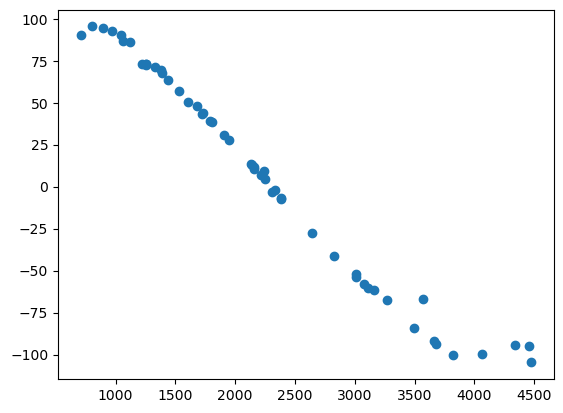

In [170]:
plt.scatter(joined["x_5"], joined["x_0.5"]-joined["x_10"])

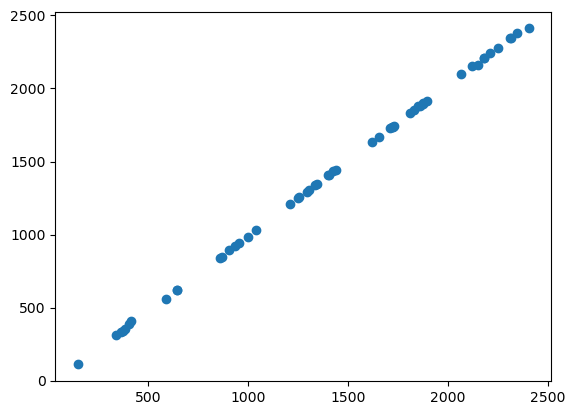

In [171]:
plt.scatter(joined["y_5"], joined["y_10"])

In [172]:
faktoren = []
for fokus in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    x = joined[[f"x_{fokus}"]]
    y = joined[[f"x_5"]]
    model = LinearRegression()
    model.fit(x, y)
    faktoren.append([fokus, model.coef_[0][0], model.intercept_[0]])
faktoren = pd.DataFrame(faktoren, columns=["fokus", "faktor", "offset"])
faktoren

,fokus,faktor,offset
0,0.5,1.031415,-7.595037e+01
1,1.0,1.028000,-6.747955e+01
2,2.0,1.020797,-5.017223e+01
3,3.0,1.013889,-3.337094e+01
4,4.0,1.006275,-1.489648e+01
5,5.0,1.000000,4.547474e-13
6,6.0,0.993093,1.618265e+01
7,7.0,0.986527,3.127459e+01
8,8.0,0.980627,4.506885e+01
9,9.0,0.974875,5.866144e+01


<AxesSubplot: xlabel='fokus', ylabel='faktor'>

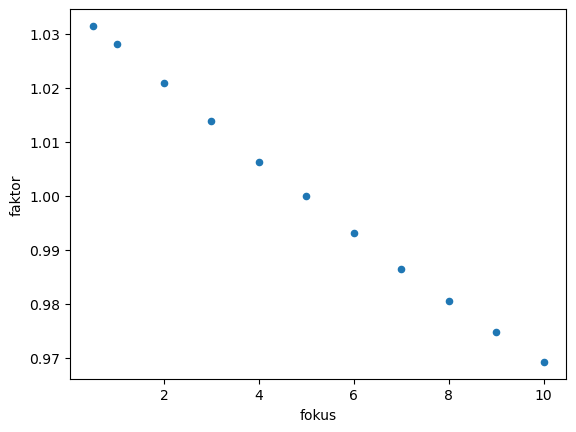

In [173]:
faktoren.plot.scatter(x="fokus", y="faktor")

<AxesSubplot: xlabel='fokus', ylabel='offset'>

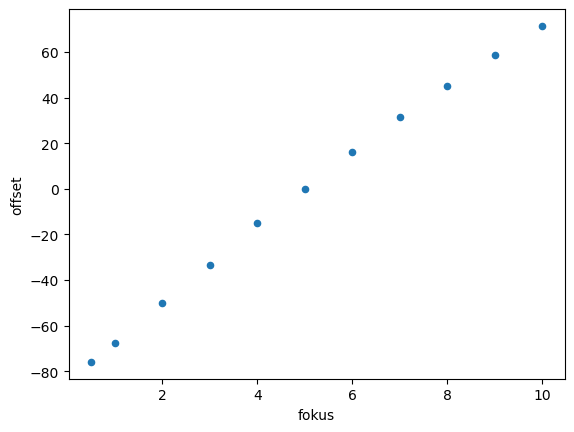

In [174]:
faktoren.plot.scatter(x="fokus", y="offset")

In [175]:
x = faktoren[["fokus"]]
y = faktoren[["offset"]]
model = LinearRegression()
model.fit(x, y)
model.coef_[0][0], model.intercept_[0]

(15.685526137243933, -80.88921656357364)

In [176]:
x = faktoren[["fokus"]]
y = faktoren[["faktor"]]
model = LinearRegression()
model.fit(x, y)
model.coef_[0][0], model.intercept_[0]

(-0.006615783908980771, 1.0338128227806382)

In [241]:
d = pd.DataFrame()
for fokus in [0.5, 1, 2, 3, 4, 6, 7, 8, 9, 10]:
    n = joined[["y_5", "x_5", f"y_{fokus}", f"x_{fokus}"]]
    n.rename(inplace=True, columns={
             f"y_{fokus}": "y_fokus", f"x_{fokus}": "x_fokus"})
    n["fokus"] = fokus
    d = pd.concat([d, n])

/tmp/ipykernel_24964/15706123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n.rename(inplace=True, columns={
/tmp/ipykernel_24964/15706123.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n["fokus"] = fokus
/tmp/ipykernel_24964/15706123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n.rename(inplace=True, columns={
/tmp/ipykernel_24964/15706123.py:6: SettingWithCopy

In [242]:
d["dx"] = d["x_fokus"]-d["x_5"]
d["dy"] = d["y_fokus"]-d["y_5"]

In [471]:
d

,y_5,x_5,y_fokus,x_fokus,fokus,dx,dy,dx_,dy_
16,1893.690186,800.475952,1874.554199,848.677368,0.5,48.201416,-19.135986,3.362760,-1.543443
17,1040.989868,897.919617,1051.243530,945.280029,0.5,47.360413,10.253662,2.991389,1.873014
18,1335.560425,967.420837,1334.574707,1015.484924,0.5,48.064087,-0.985718,4.708281,-0.012571
19,1723.283447,1044.332397,1709.296387,1080.708374,0.5,36.375977,-13.987061,-4.590061,-0.353560
20,954.554626,1062.927246,966.641357,1103.846436,0.5,40.919189,12.086731,0.121746,0.499725
...,...,...,...,...,...,...,...,...,...
14479,933.939697,3492.010498,919.340332,3537.540283,10.0,45.529785,-14.599365,1.983787,-1.028816
14518,1622.595337,3657.923584,1632.236450,3706.716797,10.0,48.793213,9.641113,1.249162,-1.448592
14519,1812.555298,3681.535400,1832.357788,3730.772217,10.0,49.236816,19.802490,1.974807,2.472212
14776,338.796692,4059.849609,311.153564,4114.066895,10.0,54.217285,-27.643127,3.834336,0.024752


In [404]:
x0 = [0.00, 2304, 1296, 5, 0]

In [459]:
from scipy.optimize import least_squares


def fun(x):
    fa1, dx, dy, s1, s2 = x
    r = ((d["y_5"]-dy)**2+(d["x_5"]-dx)**2)**0.5
    fy = d["dy"] - (d["fokus"]-s1)*fa1*(d["y_5"]-dy) - \
        r*s2*(d["fokus"]-s1)*fa1*(d["y_5"]-dy)
    fx = d["dx"] - (d["fokus"]-s1)*fa1*(d["x_5"]-dx) -\
        r*s2*(d["fokus"]-s1)*fa1*(d["x_5"]-dx)
    d["dx_"] = fx
    d["dy_"] = fy
    f = (fx*fx+fy*fy)**0.5
    return f.to_list()


res = least_squares(fun, x0, verbose=1)
res.x

/tmp/ipykernel_24964/1798682837.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["dx_"] = fx
/tmp/ipykernel_24964/1798682837.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["dy_"] = fy


`xtol` termination condition is satisfied.
Function evaluations 17, initial cost 1.0148e+03, final cost 1.0107e+03, first-order optimality 3.39e+04.


array([ 9.97214452e-03,  2.29918574e+03,  1.30566817e+03,  5.03466140e+00,
       -2.10217445e-04])

In [460]:
x0 = res.x

In [466]:
d.std()

y_5        601.391980
x_5        984.932947
y_fokus    601.099909
x_fokus    984.528662
fokus        3.187899
dx          21.229725
dy          13.836311
dx_          1.423828
dy_          1.458850
dtype: float64

<AxesSubplot: xlabel='x_5', ylabel='dx_'>

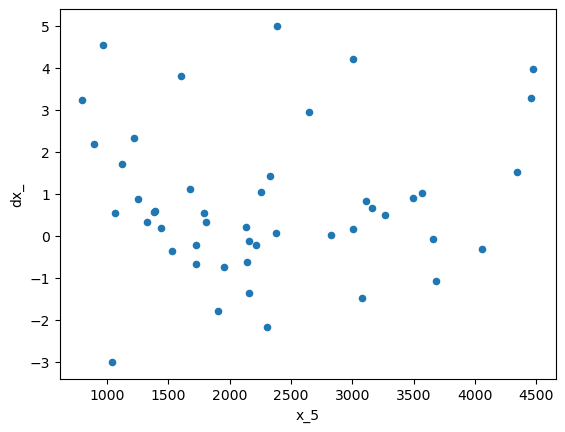

In [475]:
d[d["fokus"] == 1].plot.scatter(x="x_5", y="dx_")

In [463]:
# covariance matrix when jac not degenerate
from scipy import linalg

cov = linalg.inv(res.jac.T @ res.jac)
chi2dof = np.sum(res.fun**2)/(res.fun.size - res.x.size)
cov *= chi2dof
perr = np.sqrt(np.diag(cov))
perr

array([1.13048447e-04, 7.26034105e+00, 5.93836827e+00, 1.58696717e-02,
       4.88727541e-06])

In [458]:
filter = np.array(fun(res.x)) < chi2dof
d = d[filter]

/tmp/ipykernel_24964/1798682837.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["dx_"] = fx
/tmp/ipykernel_24964/1798682837.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["dy_"] = fy


In [474]:
res.x/perr

array([ 88.21124763, 316.67737429, 219.86985467, 317.25050626,
       -43.01321844])

<AxesSubplot: xlabel='x_5', ylabel='y_5'>

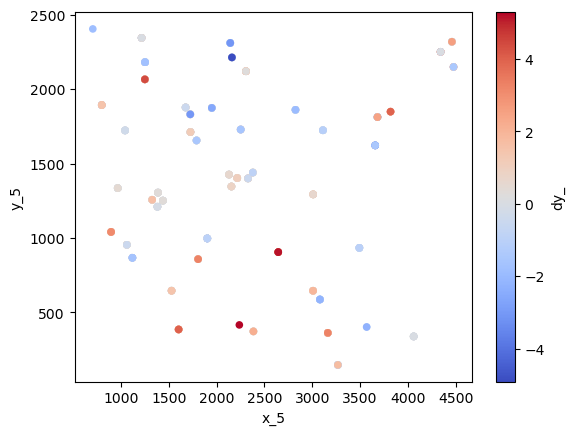

In [473]:
d.plot.scatter(x="x_5", y="y_5", c="dy_", cmap="coolwarm")